In [1]:
import os
import tarfile
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()




In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv");
    return pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")



In [3]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

# To get quick information about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

# To get information about this column and how many different values are present in the column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# To get numerical information about the data lets look at describe

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


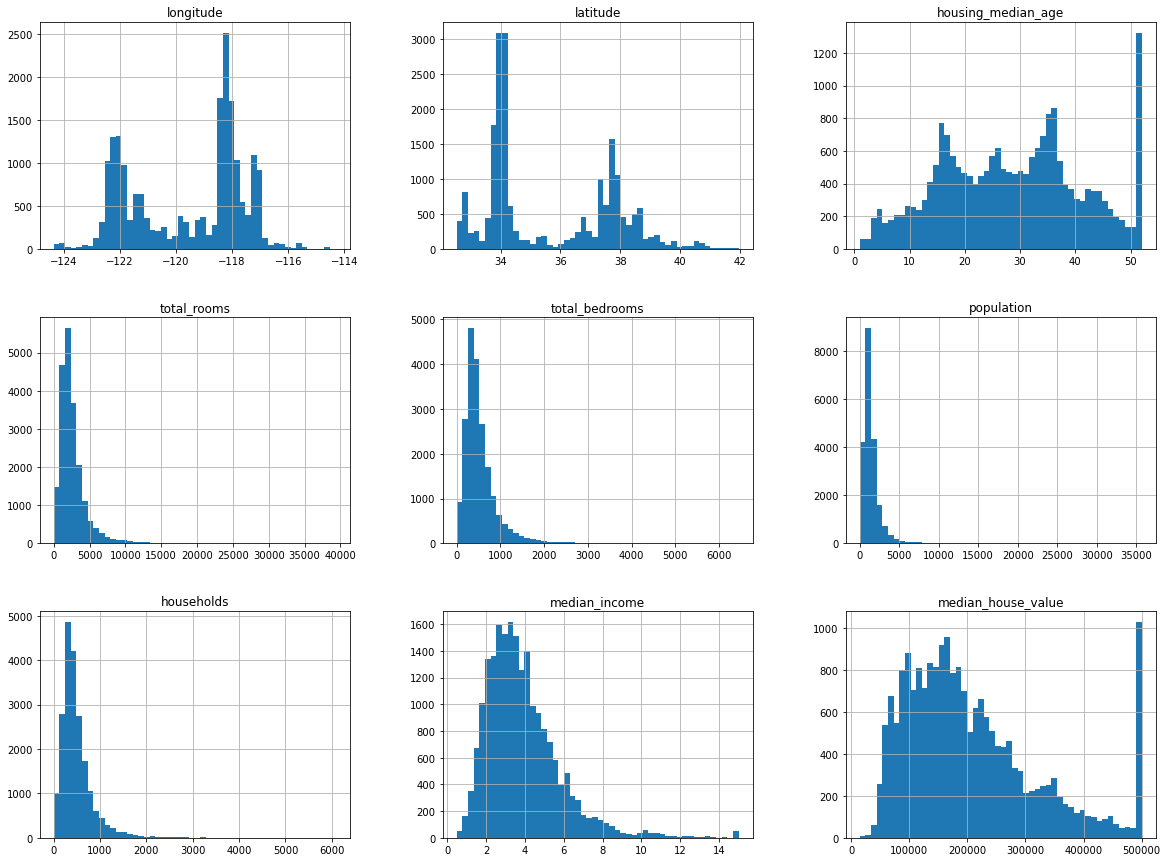

In [7]:
#  Lets plot a histogram to actually view the data in real time

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#  Lets create a test set with numpy first

import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(5)
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)

In [10]:
len(train_set)

16512

In [11]:
len(train_set)

16512

In [12]:
#  Another way of splitting the data

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=5)

In [13]:
len(train_set), len(test_set)

(16512, 4128)

<AxesSubplot:>

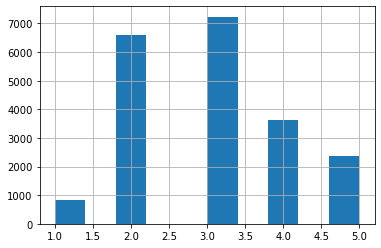

In [14]:
#  Lets specifically split the data stratgeically

housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0,1.5,3.0,4.5,6.0,np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [16]:
 strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [17]:
len(strat_test_set)

4128

In [18]:
len(strat_train_set)

16512

In [19]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

# To remove the two columns back again

In [20]:
# lets make a copy of the data because we dont want to hinder the main data

housing_copy = strat_train_set.copy()

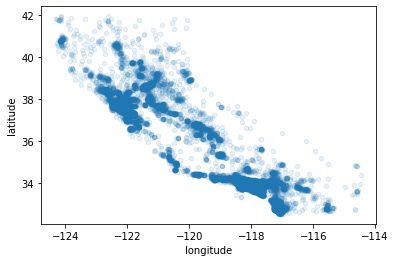

In [21]:
# Lets visualise the data because it has geographical information such as longitude and latitude

housing_copy.plot(kind="scatter", x="longitude", y = "latitude",alpha=0.1);


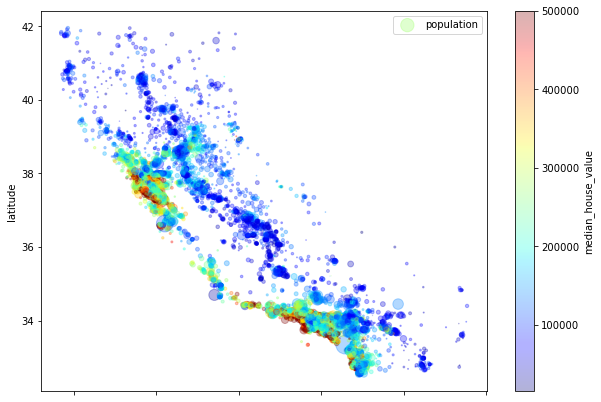

In [22]:
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
                 s=housing_copy["population"]/100, label="population", figsize=(10,7),
                  c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
                 
                 )
plt.legend();

In [23]:
# lets compute the standard correlation coefficient for the different values

corr_matrix = housing_copy.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924622,-0.111858,0.045660,0.068973,0.098344,0.055788,-0.016064,-0.047957
latitude,-0.924622,1.000000,0.013934,-0.037600,-0.066970,-0.107396,-0.071499,-0.078318,-0.142464
housing_median_age,-0.111858,0.013934,1.000000,-0.359661,-0.320337,-0.293131,-0.302353,-0.120744,0.104159
total_rooms,0.045660,-0.037600,-0.359661,1.000000,0.931515,0.856309,0.920662,0.201432,0.135369
total_bedrooms,0.068973,-0.066970,-0.320337,0.931515,1.000000,0.877671,0.980999,-0.002544,0.051031
population,0.098344,-0.107396,-0.293131,0.856309,0.877671,1.000000,0.905518,0.007531,-0.023733
households,0.055788,-0.071499,-0.302353,0.920662,0.980999,0.905518,1.000000,0.017263,0.066257
median_income,-0.016064,-0.078318,-0.120744,0.201432,-0.002544,0.007531,0.017263,1.000000,0.686568
median_house_value,-0.047957,-0.142464,0.104159,0.135369,0.051031,-0.023733,0.066257,0.686568,1.000000


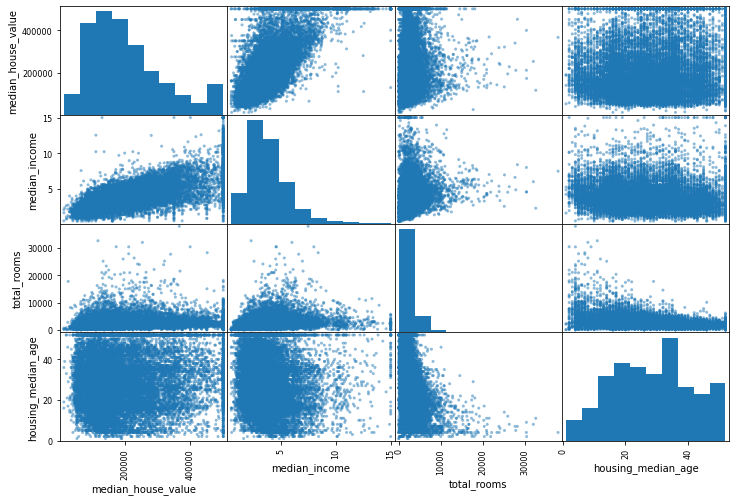

In [24]:
# Lets use scatter_matrix to actually scatter the matrix and plot all the numerical values
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", 'total_rooms', "housing_median_age"]
scatter_matrix(housing_copy[attributes], figsize=(12,8));

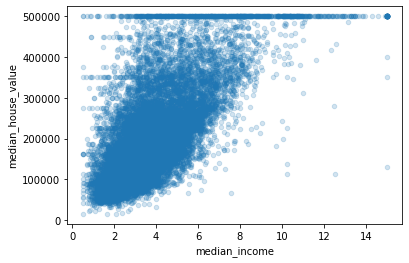

In [25]:
# The most prominent attribute at this point of time seems like median_income

housing_copy.plot(kind="scatter", x="median_income", y="median_house_value",
                 alpha=0.2);

In [26]:
# Now we can actually see that there are certain columns that are ambiguous lets take an example of them
# Like total_rooms and households 
# Lets make these particular columns better and informative by adding our own columns in the dataset

housing_copy["rooms_per_house"] = housing_copy["total_rooms"]/housing_copy["households"]
housing_copy["bedrooms_per_room"] = housing_copy["total_bedrooms"]/housing_copy["total_rooms"]
housing_copy["population_per_household"] = housing_copy["population"]/housing_copy["households"]


In [27]:
corr_matrix = housing_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686568
rooms_per_house             0.143970
total_rooms                 0.135369
housing_median_age          0.104159
households                  0.066257
total_bedrooms              0.051031
population_per_household   -0.021512
population                 -0.023733
longitude                  -0.047957
latitude                   -0.142464
bedrooms_per_room          -0.255372
Name: median_house_value, dtype: float64

We can clearly see that houses with lower number of bedrooms tend to be more expensive


## Preparing the data for Machine Learning Algorithms

It is always advisable to make functions for the same owing to the fact

- This will promote code reusability
- We will have a library of functions that we may use in the future projects
- To feed the new data anytime
- To see which combination of data works for us


In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


## Data Cleaning

Lets fix the missing values section like the total_bedrooms column

3 ways of handling the missing data
- Get rid of the data
- Get rid of the attribute altogether
- Set the values to some value(zero, the mean, the median)


In [29]:
# Lets see the example of the three  methods

# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
# median = housing["total_bedrooms"].median() # option 3
# housing["total_bedrooms"].fillna(median, inplace=True

We can also use sklearn for the same. Lets use the scikit learn Simple Imputer class to take care of the missing values for us

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # This will use the strategy median to fill all the missing values in the dataset


# Also median works only on numeric data so drop the ocean_proximity column from the same dataset

housing_num = housing.drop("ocean_proximity", axis=1)


# Fit the imputer on your desired data

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
housing_num.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        172
population              0
households              0
median_income           0
dtype: int64

In [36]:
# Now lets use the trained imputer to transform the training set by replacing missing values with the learned medians

# X = imputer.transform(housing_num)

In [37]:
# If you want to put it back into a pandas DataFrame, it’s simple:
# housing_tr = pd.DataFrame(
#     X, columns=housing_num.columns,
#                          index=housing_num.index
#                          )

## Scikit Learn Design

- Consistent
- Estimators (fits the data and then uses labels along with hyper parameters to work on the data)
- Transformers To return the transformed dataset fit_transform() is like fit() then transform() is optimized and runs much faster
- Predictors Finally some estimators given a dataset are capable of making predictions which are called as predictors which has predict() to predict the output of the same
- Inspection
- Non Proliferation of classes Numpy or scipy represtation
- Compostion Using pipeline
- Sensible defaults for all values




Lets handle the textual data catgeories

In [38]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
11397,<1H OCEAN
13036,INLAND
6055,<1H OCEAN
6754,<1H OCEAN
867,NEAR BAY
19510,INLAND
6778,<1H OCEAN
7921,<1H OCEAN
2428,INLAND
20630,INLAND


We can clearly see that this particular column has categories so lets convert it into numbers



In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
housing_cat_encoded = ordinalEncoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [40]:
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

However we can clearly see that this may cause confusion as certain labels such as '0' and label '4' are very similar so lets go for `one_hot_encoding`

In [41]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

We see it makes a SparseMatrix instead of a NumPy array. This is because it creates many columns where it just stores the category with 1 and rest others are 0 and tries to save memory for that.

In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
         return self # nothing else to do
     def transform(self, X):
         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
         population_per_household = X[:, population_ix] / X[:, households_ix]
         if self.add_bedrooms_per_room:
             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
             return np.c_[X, rooms_per_household, population_per_household,
                 bedrooms_per_room]
         else:
             return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


## Feature Scaling

Two types of feature scaling
- Normalization (Min Max Scaling) values betweeen 0 and 1
- Standardization between particular small values 



## Transformation Pipelines


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler(with_mean=False)),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

## Column Trasformer

Use to manage the text and numerical data together

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # This is for the numerical Data
    ("cat", OneHotEncoder(), cat_attribs), # This is definitely for the categorical data
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train Model

Lets try a linear regression first and see what output we get


In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

Predictions: [270543.65171472 115273.36581187 281305.16841152 232378.10888898
 282239.78881417]
Labels: [273400.0, 121900.0, 310700.0, 280000.0, 318300.0]


Lets find out the mean squared error

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions  = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68651.79556680842

This has given us a large rmse so lets try to use another model



In [49]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                       scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
 print("Scores:", scores)
 print("Mean:", scores.mean())
 print("Standard deviation:", scores.std())

In [52]:
display_scores(tree_rmse_scores)

Scores: [74050.5995355  68818.56009456 69581.47203233 70536.0134738
 69932.26486719 70290.45490364 67921.05934299 75427.85428782
 72357.09025912 71424.70137318]
Mean: 71034.00701701226
Standard deviation: 2214.3198697447065


In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                       scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [55]:
display_scores(forest_rmse_scores)

Scores: [51182.99174725 49838.98175289 48719.600721   50258.73834106
 50594.92461946 47378.66840442 46968.4792202  51603.39489841
 49860.25715871 51799.44746228]
Mean: 49820.548432569325
Standard deviation: 1582.832361587665


In [56]:
# import joblib
# joblib.dump(my_model, "my_model.pkl")
# # and later...
# my_model_loaded = joblib.load("my_model.pkl")


## Fine Tune your model

Use GridSearch to find the best hyperParams for our model instead of doing it manually.

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},

]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
 print(np.sqrt(-mean_score), params)

63847.55264008437 {'max_features': 2, 'n_estimators': 3}
55383.802111030396 {'max_features': 2, 'n_estimators': 10}
52471.456235984915 {'max_features': 2, 'n_estimators': 30}
60108.19450952938 {'max_features': 4, 'n_estimators': 3}
52346.470964270775 {'max_features': 4, 'n_estimators': 10}
50265.792497744354 {'max_features': 4, 'n_estimators': 30}
59104.004348628834 {'max_features': 6, 'n_estimators': 3}
52207.73533500036 {'max_features': 6, 'n_estimators': 10}
49458.17859740188 {'max_features': 6, 'n_estimators': 30}
59372.18738872877 {'max_features': 8, 'n_estimators': 3}
52061.62439819366 {'max_features': 8, 'n_estimators': 10}
49884.73896765294 {'max_features': 8, 'n_estimators': 30}
62179.29459385319 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53700.34523062478 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59469.23247997518 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52143.53533179695 {'bootstrap': False, 'max_features': 3, 'n_estimators

## Evaluating your model on the test set

In [60]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

49185.349721013685

In [61]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
   loc=squared_errors.mean(),
   scale=stats.sem(squared_errors)))

array([47067.2385961 , 51215.93800073])

## Excercises 

1. Trying a Support Vector Machine regressor model

In [81]:
from sklearn.svm import SVR
param_grid_svm = [
    {'kernel': ['linear'], 'C': [10., 30., 100.]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30.], 
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},    
]
svr = SVR()
grid_search_svm = GridSearchCV(svr, param_grid_svm, cv=5, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
grid_search_svm.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [10.0, 30.0, 100.0], 'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(grid_search_svm, housing_prepared, housing_labels,
#                        scoring="neg_mean_squared_error", cv=1)
# grid_search_svm_scores = np.sqrt(-scores)

In [ ]:
# display_scores(grid_search_svm_scores)

2. Try using RandomisedSearchCV

In [83]:
from scipy.stats import expon, reciprocal

param_distribs_svm = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 2000),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rnd_search_svm = RandomizedSearchCV(svm_reg, param_distributions=param_distribs_svm,
                                n_iter=26, cv=5, scoring='neg_mean_squared_error', 
                                verbose=2, random_state=42, n_jobs=-1)
rnd_search_svm.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=26, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DFC4DFC1C0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DFC4DF84C0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rnd_search_svm.best_params_

{'C': 1851.3637984133752, 'gamma': 0.628789100540856, 'kernel': 'linear'}

3. Try adding a transformer in preparation pipeline

In [88]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.90281470e-02, 7.11223667e-02, 4.29202996e-02, 1.76529077e-02,
       1.73459257e-02, 1.80279077e-02, 1.59086535e-02, 2.71943353e-01,
       7.25010229e-02, 1.09371125e-01, 1.10681301e-01, 8.86823737e-03,
       1.56213031e-01, 1.93934284e-04, 3.27094600e-03, 4.95084052e-03])

In [89]:
def extract_top_k_indices(importances, k):
    # Get the indices we care about
    return np.sort(np.argpartition(importances,-k)[-k:]) 

In [90]:
k=5
top_k_indices = extract_top_k_indices(feature_importances, k)
top_k_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [94]:
# feature_names = np.array(attributes)[top_k_indices]
# feature_names

In [95]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.07902814703266105, 'median_house_value'),
 (0.07112236673765815, 'median_income'),
 (0.04292029964997569, 'total_rooms'),
 (0.017652907665619437, 'housing_median_age')]

In [96]:
class TopKFeatureSelector(BaseEstimator, TransformerMixin):
    # function 1
    def __init__(self, feature_importances, k):
        self.k = k
        self.feat_imp = feature_importances
    # function 2
    def fit(self, X, y=None):
        self.top_k_indices = extract_top_k_indices(self.feat_imp, self.k)
        return self
    # function 3
    def transform(self, X):
        return X[:, self.top_k_indices]

In [97]:
feat_select_pipeline = Pipeline([
    ('preparation', full_pipeline), # same one as before
    ('feature_selection', TopKFeatureSelector(feature_importances, k)) # New block 
])

In [98]:
housing_top_k_prepared = feat_select_pipeline.fit_transform(housing)
housing_top_k_prepared[:3] 

array([[-58.87741365,   2.83845273,   0.27375474,   2.51832323,
          0.        ],
       [-60.47449531,   1.56861036,   0.23125292,   3.21266034,
          1.        ],
       [-58.82251396,   3.33983289,   0.28116597,   2.37719877,
          0.        ]])

In [99]:
housing_prepared[0:3, top_k_indices] 

array([[-58.87741365,   2.83845273,   0.27375474,   2.51832323,
          0.        ],
       [-60.47449531,   1.56861036,   0.23125292,   3.21266034,
          1.        ],
       [-58.82251396,   3.33983289,   0.28116597,   2.37719877,
          0.        ]])

4. Try creating a single pipeline that does the full data preparation plus the final prediction

In [105]:
end_to_end_pipeline = Pipeline([
    ('preparation', full_pipeline), # Prepare the Data
    ('feature_selection', TopKFeatureSelector(feature_importances, k)), # Choose the best features
    ('svm_reg', SVR(**rnd_search_svm.best_params_)) # Make Predictions
])

In [110]:
# end_to_end_pipeline.fit(housing, housing_labels)

In [107]:
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]

print("Predictions: ", end_to_end_pipeline.predict(sample_data))
print("True Labels: ", list(sample_labels))

Predictions:  [261608.49212807 117614.51356996 299981.52810767 192900.51903369
 322574.92768194]
True Labels:  [273400.0, 121900.0, 310700.0, 280000.0, 318300.0]


5. Automatically explore some preparation options using GridSearchCV


In [108]:
param_grid_auto = [{
    'preparation__num__imputer__strategy': ['median', 'most_frequent']
}]

auto_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('svm_reg', SVR(**rnd_search_svm.best_params_))
])

grid_search_prep = GridSearchCV(auto_pipeline, param_grid_auto, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........preparation__num__imputer__strategy=median; total time=   7.0s
[CV] END .........preparation__num__imputer__strategy=median; total time=   7.1s
[CV] END .........preparation__num__imputer__strategy=median; total time=   7.3s
[CV] END .........preparation__num__imputer__strategy=median; total time=   7.1s
[CV] END .........preparation__num__imputer__strategy=median; total time=   7.3s
[CV] END ..preparation__num__imputer__strategy=most_frequent; total time=   7.0s
[CV] END ..preparation__num__imputer__strategy=most_frequent; total time=   7.1s
[CV] END ..preparation__num__imputer__strategy=most_frequent; total time=   7.2s
[CV] END ..preparation__num__imputer__strategy=most_frequent; total time=   6.9s
[CV] END ..preparation__num__imputer__strategy=most_frequent; total time=   7.2s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler(with_mean=False))]),
                                                                         ['longitude',
                                                                          'lat

In [109]:
grid_search_prep.best_params_

{'preparation__num__imputer__strategy': 'most_frequent'}